<a href="https://colab.research.google.com/github/aryanasadianuoit/Cloth-Detection/blob/master/Cloth_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf

print(tf.__version__)
!pip uninstall tensorflow

1.15.0
Uninstalling tensorflow-1.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/freeze_graph
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-1.15.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
    /usr/local/lib/python3.6/dist-packages/tensorflow_core/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-1.15.0


In [5]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 42kB/s 
     |████████████████████████████████| 3.8MB 46.5MB/s 
     |████████████████████████████████| 450kB 69.9MB/s 
     |████████████████████████████████| 81kB 14.1MB/s 
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.11.0 which is incompatible.
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled google-auth-1.4.2
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1


In [6]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [7]:
from __future__ import absolute_import, division, print_function, unicode_literals

#Tensorflow and tf.kera
import tensorflow as tf
from tensorflow import keras

#import some helpful libraries Numpy for computations and Matpltlib for plotting the data
import numpy as np
import matplotlib.pyplot as plt


print(tf.__version__)
fashion_mnist = keras.datasets.fashion_mnist
(train_images,train_labels), (test_images, test_labels) = fashion_mnist.load_data()

1.15.0
4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names =  ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [9]:
train_images.shape

(60000, 28, 28)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
len(train_images)

60000

In [12]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

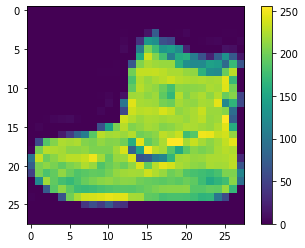

In [13]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images /255.0
test_images = test_images /255.0

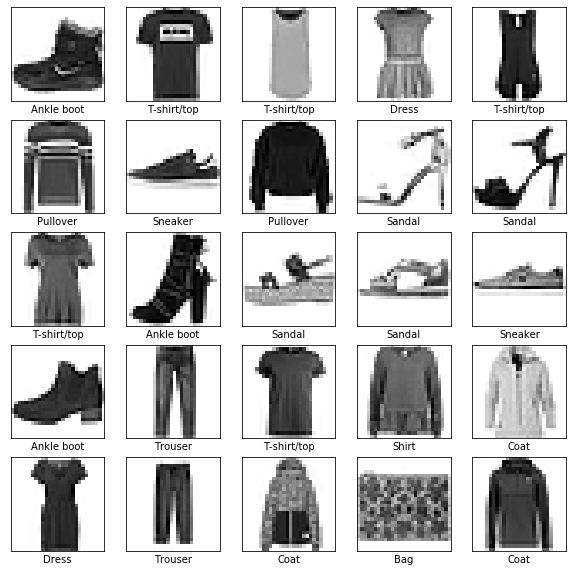

In [15]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In this case, we are going to build the model


In [16]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10,activation='softmax')
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#We need to define the loss function , optimizer and one metric for the processof training and tetsting
model.compile(optimizer='adam',
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

NOW IT's Time to train the model

In [18]:
model.fit(train_images,train_labels,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4952 - acc: 0.8276
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3771 - acc: 0.8647
Epoch 3/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.3361 - acc: 0.8779
Epoch 4/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3143 - acc: 0.8850
Epoch 5/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.2964 - acc: 0.8912
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2829 - acc: 0.8948
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2704 - acc: 0.9003
Epoch 8/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2587 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2507 - acc: 0.9064
Epoch 10/10
60000/60000 [==============================] - 

Evaluate accuracy


In [19]:
test_loss, test_accuracy = model.evaluate(test_images,test_labels,verbose=2)
print('\n Test Accuracy: ',test_accuracy)

10000/10000 - 0s - loss: 0.3490 - acc: 0.8792

 Test Accuracy:  0.8792


It's time to PREDICT!!!

In [20]:
predictions = model.predict(test_images)
predictions[0]

array([1.8909577e-07, 1.7131482e-10, 8.9625608e-08, 7.5457930e-12,
       3.3937053e-07, 2.6124788e-03, 4.5725926e-08, 1.0579849e-02,
       7.8896756e-09, 9.8680705e-01], dtype=float32)

In [21]:
predictions[9]


array([2.7756439e-10, 7.3791068e-10, 9.3984195e-12, 7.2011234e-13,
       1.2311466e-10, 2.6566995e-04, 7.4465989e-12, 9.9972969e-01,
       6.4614514e-09, 4.6304681e-06], dtype=float32)

In [22]:
np.argmax(predictions[0])

9

In [23]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array,true_label[i],img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label],
                                       color = color))
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


NOW TIME TO TEST


<function matplotlib.pyplot.show>

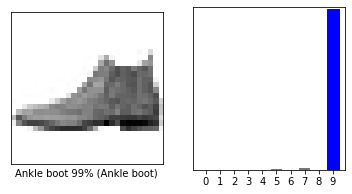

In [25]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show

Now we are going to plot several images via their predictions

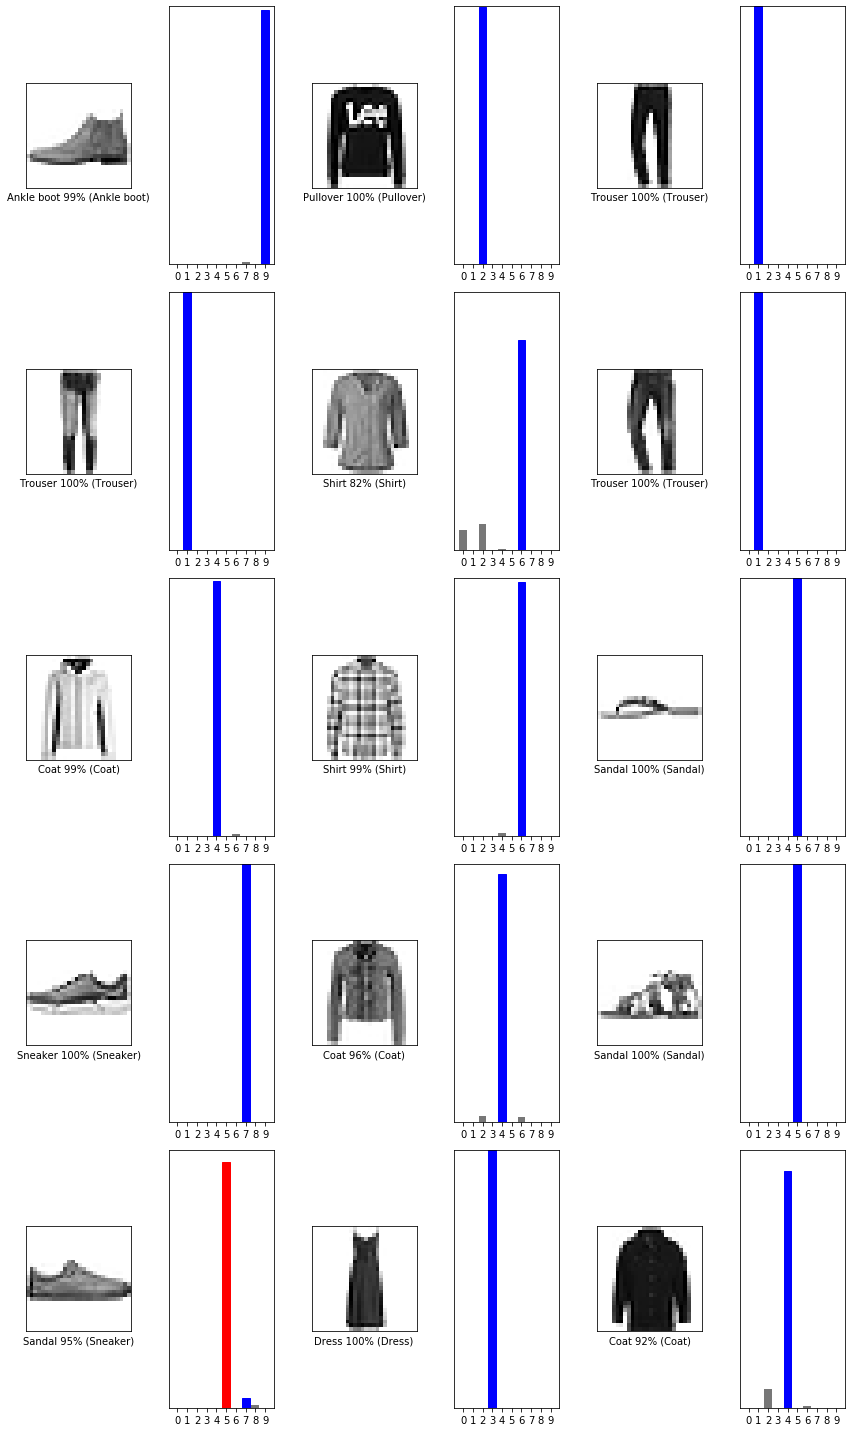

In [38]:
num_rows = 5
num_columns = 3
num_images = num_rows * num_columns
plt.figure(figsize=(2*2*num_columns,2*2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows,2*num_columns,2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows,2*num_columns,2*i+2)
  plot_value_array(i,predictions[i],true_label= test_labels)
plt.tight_layout()
plt.show()



NOW USING THE TRAINED MODEL:


In [39]:
img = test_images[10]
print(img.shape)

(28, 28)


GOOD POINT! Cross models have to be optimized on bathes, even in the case that you want to use one single point for optimization, you have to use a list of one member to do it:


In [0]:
img =  np.expand_dims(img,0)

In [42]:
prediction_single = model.predict(img)
print(prediction_single)

[[7.6734359e-06 1.3705306e-06 2.2174874e-02 1.2269473e-07 9.5961118e-01
  2.8293639e-09 1.8204411e-02 2.2205028e-11 3.1547838e-08 2.9303206e-07]]


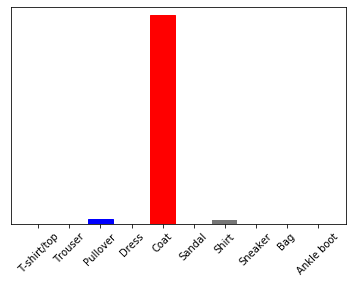

In [44]:
plot_value_array(1, prediction_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [47]:
img2 = test_images[1]
print(img2.shape)
img2 =  np.expand_dims(img2,0)
prediction_single2 = model.predict(img2)
print(prediction_single2)

(28, 28)
[[8.1807702e-06 4.2874301e-13 9.9793255e-01 6.4007022e-10 2.0222766e-03
  4.6113738e-12 3.7020429e-05 1.2006534e-17 1.1000378e-11 7.9848081e-12]]


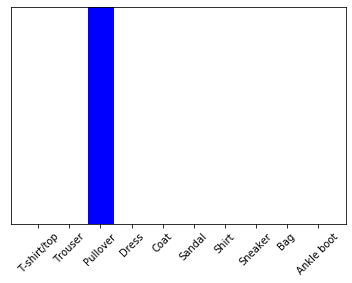

In [48]:
plot_value_array(1, prediction_single2[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)